In [1]:
from tqdm import tqdm 
from xml.etree import ElementTree as ET
from datetime import datetime
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics.cluster import entropy, mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
MI = lambda x, y: mutual_info_score(x, y)
NMI = lambda x, y: mutual_info_regression(x, y)#normalized_mutual_info_score(x, y, average_method='arithmetic')
AMI = lambda x, y: adjusted_mutual_info_score(x, y, average_method='arithmetic')

In [29]:
task_name = 'trial-duration-prediction/trial-duration-prediction_MI.csv'
target = pd.read_csv(task_name, index_col=0)
target = target[target['Not NA'] > target['Not NA']['required_header/download_date'] * 0.2]
target = target[target['var'].fillna(-1) != 0]
target
target.to_csv(task_name.replace('.csv', '_filtered.csv'))

In [6]:
All_data = []
for i in range(10):
    All_data.append(pd.read_csv(f'../../preprocess_data/All_data_part{i}.csv', index_col=0, low_memory=False))
    # print(len(All_data[i].columns))
    
All_Ori = pd.concat(All_data)

In [2]:
feature_info = pd.read_csv('feature_info.csv', index_col=0)
features_category = feature_info[feature_info['len(key)'] < 15].index
features_continuous = ['eligibility/minimum_age', 'eligibility/maximum_age', 'number_of_arms']

In [7]:
from numpy import nan
def refine_age(value):
    if pd.isnull(value):
        return None
    elif 'Year' in value:
        return int(value.split(' ')[0])
    elif 'Month' in value:
        return int(value.split(' ')[0]) / 12
    elif 'Week' in value:
        return int(value.split(' ')[0]) / 52
    elif 'Day' in value:
        return int(value.split(' ')[0]) / 365
    else:
        return None

All_Ori['eligibility/minimum_age'] = All_Ori['eligibility/minimum_age'].apply(refine_age)
All_Ori['eligibility/maximum_age'] = All_Ori['eligibility/maximum_age'].apply(refine_age)

## adverse-event-rate-prediction

In [19]:
task_name = 'adverse-event-rate-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
All = All_Ori.loc[target.index]
target = target['serious_adverse_rate']
MI_VAR = []
for feature_name in features_category:
    print(feature_name, end='  ')
    notna = All[feature_name].notna().sum()
    print('非NA数量:', notna, end='  ')
    var = All[All[feature_name].notna()][feature_name].astype('category').cat.codes.var()
    print('Var: ', var, end='  ')
    if notna < 5:
        mi = 'N/A'
        print('MI: ', mi)
    else:
        mi = NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes.to_numpy().reshape(-1, 1), target.loc[All[All[feature_name].notna()].index])[0]
        print('MI: ', mi)

    MI_VAR.append((feature_name, notna, var, mi, 'Category'))

for feature_name in features_continuous:
    print(feature_name, end='  ')
    notna = All[feature_name].notna().sum()
    print('非NA数量:', notna, end='  ')
    var = All[All[feature_name].notna()][feature_name].var()
    print('Var: ', var, end='  ')
    if notna < 5:
        mi = 'N/A'
        print('MI: ', mi)
    else:
        mi = NMI(All[All[feature_name].notna()][feature_name].to_numpy().reshape(-1, 1), target.loc[All[All[feature_name].notna()].index])[0]
        print('MI: ', mi)

    MI_VAR.append((feature_name, notna, var, mi, 'Continues'))

df = pd.DataFrame(MI_VAR, columns=['feature_name', 'Not NA', 'var', 'MI', 'Category/Continues']).set_index('feature_name')

for feature_name in feature_info.index:
    if feature_name not in df.index:
        df.loc[feature_name] = (All[feature_name].notna().sum(), None, None, None)
        print(feature_name, '非NA数量:', All[feature_name].notna().sum())
        
df.to_csv(f'{task_name}/serious_adverse_rate_MI.csv')

required_header/download_date  非NA数量: 31306  Var:  0.0  MI:  0.003770619271152409
required_header/link_text  非NA数量: 31306  Var:  0.0  MI:  0
sponsors/lead_sponsor/agency_class  非NA数量: 31306  Var:  1.0093108922010927  MI:  0.08698691984091722
overall_status  非NA数量: 31306  Var:  1.2854321348110327  MI:  0.02592061681115032
phase  非NA数量: 20589  Var:  2.4542424500726763  MI:  0.08321975746523114
study_type  非NA数量: 31306  Var:  0.04693039681579317  MI:  0.0048368019356219705
has_expanded_access  非NA数量: 30882  Var:  0.008921260382614754  MI:  0.0052427723820343
study_design_info/intervention_model  非NA数量: 30008  Var:  1.2978838972941327  MI:  0.07773698165878029
study_design_info/primary_purpose  非NA数量: 30061  Var:  4.632484584516253  MI:  0.06539074543025114
eligibility/gender  非NA数量: 31306  Var:  0.2087674959304742  MI:  0.0044778127862872275
eligibility/healthy_volunteers  非NA数量: 31261  Var:  0.16618690719906895  MI:  0.07911606445455899
study_first_posted{type}  非NA数量: 31306  Var:  0.236

In [18]:
task_name = 'adverse-event-rate-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
All = All_Ori.loc[target.index]
target = target['mortality_rate']
MI_VAR = []
for feature_name in features_category:
    print(feature_name, end='  ')
    notna = All[feature_name].notna().sum()
    print('非NA数量:', notna, end='  ')
    var = All[All[feature_name].notna()][feature_name].astype('category').cat.codes.var()
    print('Var: ', var, end='  ')
    if notna < 5:
        mi = 'N/A'
        print('MI: ', mi)
    else:
        mi = NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes.to_numpy().reshape(-1, 1), target.loc[All[All[feature_name].notna()].index])[0]
        print('MI: ', mi)

    MI_VAR.append((feature_name, notna, var, mi, 'Category'))

for feature_name in features_continuous:
    print(feature_name, end='  ')
    notna = All[feature_name].notna().sum()
    print('非NA数量: ', notna, end='  ')
    var = All[All[feature_name].notna()][feature_name].var()
    print('Var: ', var, end='  ')
    if notna < 5:
        mi = 'N/A'
        print('MI: ', mi)
    else:
        mi = NMI(All[All[feature_name].notna()][feature_name].to_numpy().reshape(-1, 1), target.loc[All[All[feature_name].notna()].index])[0]
        print('MI: ', mi)

    MI_VAR.append((feature_name, notna, var, mi, 'Continues'))

df = pd.DataFrame(MI_VAR, columns=['feature_name', 'Not NA', 'var', 'MI', 'Category/Continues']).set_index('feature_name')
for feature_name in feature_info.index:
    if feature_name not in df.index:
        df.loc[feature_name] = (All[feature_name].notna().sum(), None, None, None)
        print(feature_name, '非NA数量:', All[feature_name].notna().sum())
        
df.to_csv(f'{task_name}/mortality_rate_MI.csv')

required_header/download_date  非NA数量: 31306  Var:  0.0  MI:  0
required_header/link_text  非NA数量: 31306  Var:  0.0  MI:  0.005321291583228138
sponsors/lead_sponsor/agency_class  非NA数量: 31306  Var:  1.0093108922010927  MI:  0.02941216781870004
overall_status  非NA数量: 31306  Var:  1.2854321348110327  MI:  0.021852490260250157
phase  非NA数量: 20589  Var:  2.4542424500726763  MI:  0.05614331097131231
study_type  非NA数量: 31306  Var:  0.04693039681579317  MI:  0.0025488686689589812
has_expanded_access  非NA数量: 30882  Var:  0.008921260382614754  MI:  0.0063649290812808346
study_design_info/intervention_model  非NA数量: 30008  Var:  1.2978838972941327  MI:  0.05278978263340406
study_design_info/primary_purpose  非NA数量: 30061  Var:  4.632484584516253  MI:  0.03537093044256512
eligibility/gender  非NA数量: 31306  Var:  0.2087674959304742  MI:  0.006102674711614853
eligibility/healthy_volunteers  非NA数量: 31261  Var:  0.16618690719906895  MI:  0.05198940632596738
study_first_posted{type}  非NA数量: 31306  Var:  0.

## participant-dropout-prediction

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
# target = pd.read_csv('trial-duration-prediction/output.csv')['time_day']
target = pd.read_csv('participant-flow-prediction/output.csv', index_col=0)['droupout_rate']
# 将连续变量离散化
# est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
# continuous_target_discrete = est.fit_transform(target.values.reshape(-1, 1)).flatten()

In [17]:
task_name = 'participant-flow-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
All = All_Ori.loc[target.index]
target = target['droupout_rate']
MI_VAR = []
for feature_name in features_category:
    print(feature_name, end='  ')
    notna = All[feature_name].notna().sum()
    print('非NA数量:', notna, end='  ')
    var = All[All[feature_name].notna()][feature_name].astype('category').cat.codes.var()
    print('Var: ', var, end='  ')
    if notna < 5:
        mi = 'N/A'
        print('MI: ', mi)
    else:
        mi = NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes.to_numpy().reshape(-1, 1), target.loc[All[All[feature_name].notna()].index])[0]
        print('MI: ', mi)

    MI_VAR.append((feature_name, notna, var, mi, 'Category'))

for feature_name in features_continuous:
    print(feature_name, end='  ')
    notna = All[feature_name].notna().sum()
    print('非NA数量:', notna, end='  ')
    var = All[All[feature_name].notna()][feature_name].var()
    print('Var: ', var, end='  ')
    if notna < 5:
        mi = 'N/A'
        print('MI: ', mi)
    else:
        mi = NMI(All[All[feature_name].notna()][feature_name].to_numpy().reshape(-1, 1), target.loc[All[All[feature_name].notna()].index])[0]
        print('MI: ', mi)

    MI_VAR.append((feature_name, notna, var, mi, 'Continues'))

df = pd.DataFrame(MI_VAR, columns=['feature_name', 'Not NA', 'var', 'MI', 'Category/Continues']).set_index('feature_name')
for feature_name in feature_info.index:
    if feature_name not in df.index:
        df.loc[feature_name] = (All[feature_name].notna().sum(), None, None, None)
        print(feature_name, '非NA数量:', All[feature_name].notna().sum())
        
df.to_csv(f'{task_name}/participants_dropout_rate_MI.csv')

required_header/download_date  非NA数量: 62058  Var:  0.0  MI:  0.00024888797725131084
required_header/link_text  非NA数量: 62058  Var:  0.0  MI:  0.0011895647223001404
sponsors/lead_sponsor/agency_class  非NA数量: 62058  Var:  1.0303651724591845  MI:  0.05607231097560561
overall_status  非NA数量: 62058  Var:  1.1652013161966617  MI:  0.06296578200516612
phase  非NA数量: 42786  Var:  2.5043924114216587  MI:  0.06881710433308452
study_type  非NA数量: 62058  Var:  0.05945918507760948  MI:  0.004158037126480885
has_expanded_access  非NA数量: 61574  Var:  0.006213644518638787  MI:  0.003160143348626576
study_design_info/intervention_model  非NA数量: 58441  Var:  1.3431203429385206  MI:  0.07196649034151381
study_design_info/primary_purpose  非NA数量: 57781  Var:  4.2723416587077585  MI:  0.026069729074326364
eligibility/gender  非NA数量: 62058  Var:  0.2137329888626816  MI:  0.002332337215137592
eligibility/healthy_volunteers  非NA数量: 61964  Var:  0.15884854238204024  MI:  0.02830828895978721
study_first_posted{type}  非

In [ ]:
for feature_name in features_category:
    print(feature_name, end='  ')
    print('非NA数量:', All[feature_name].notna().sum(), end='  ')
    print('NMI: ', NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes, continuous_target_discrete[All[feature_name].notna()]))
    # sns.countplot(data=All, y=feature_name, hue=feature_name)
    # plt.show()

required_header/download_date  非NA数量: 62058  NMI:  0.0
required_header/link_text  非NA数量: 62058  NMI:  0.0
sponsors/lead_sponsor/agency_class  非NA数量: 62058  NMI:  0.009851515106071315
overall_status  非NA数量: 62058  NMI:  0.04130900160348425
phase  非NA数量: 42786  NMI:  0.013705405790074465
study_type  非NA数量: 62058  NMI:  0.002811026538073855
has_expanded_access  非NA数量: 61574  NMI:  0.0021548332918209334
study_design_info/intervention_model  非NA数量: 58441  NMI:  0.01705521572004618
study_design_info/primary_purpose  非NA数量: 57781  NMI:  0.014057163916747478
eligibility/gender  非NA数量: 62058  NMI:  0.0006461978030121632
eligibility/healthy_volunteers  非NA数量: 61964  NMI:  0.01946112079829883
study_first_posted{type}  非NA数量: 62058  NMI:  0.0019778382727979387
last_update_posted{type}  非NA数量: 62058  NMI:  0.0006248423236193851
study_design_info/observational_model  非NA数量: 3274  NMI:  0.013951129236524073
study_design_info/time_perspective  非NA数量: 3402  NMI:  0.035008285293421045
oversight_info/has

## trial-approval-prediction

In [ ]:
task_name = 'trial-approval-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
All = All_Ori.loc[target.index]
target = target['label']
MI_VAR = []
for feature_name in features_category:
    print(feature_name, end='  ')
    notna = All[feature_name].notna().sum()
    print('非NA数量:', notna, end='  ')
    var = All[All[feature_name].notna()][feature_name].astype('category').cat.codes.var()
    print('Var: ', var, end='  ')
    if notna < 5:
        mi = 'N/A'
        print('MI: ', mi)
    else:
        mi = NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes.to_numpy().reshape(-1, 1), target.loc[All[All[feature_name].notna()].index])[0]
        print('MI: ', mi)

    MI_VAR.append((feature_name, notna, var, mi, 'Category'))

for feature_name in features_continuous:
    print(feature_name, end='  ')
    notna = All[feature_name].notna().sum()
    print('非NA数量:', notna, end='  ')
    var = All[All[feature_name].notna()][feature_name].var()
    print('Var: ', var, end='  ')
    if notna < 5:
        mi = 'N/A'
        print('MI: ', mi)
    else:
        mi = NMI(All[All[feature_name].notna()][feature_name].to_numpy().reshape(-1, 1), target.loc[All[All[feature_name].notna()].index])[0]
        print('MI: ', mi)

    MI_VAR.append((feature_name, notna, var, mi, 'Continues'))

df = pd.DataFrame(MI_VAR, columns=['feature_name', 'Not NA', 'var', 'MI', 'Category/Continues']).set_index('feature_name')
for feature_name in feature_info.index:
    if feature_name not in df.index:
        df.loc[feature_name] = (All[feature_name].notna().sum(), None, None, None)
        print(feature_name, '非NA数量:', All[feature_name].notna().sum())

df.to_csv(f'{task_name}/{task_name}_MI.csv')

required_header/download_date  非NA数量: 291395  Var:  0.0
MI:  0required_header/link_text  非NA数量: 291395  Var:  0.0
MI:  0.0006303933207503221sponsors/lead_sponsor/agency_class  非NA数量: 291395  Var:  0.842102800235118
MI:  0.0008946939130680676overall_status  非NA数量: 291395  Var:  0.08689541585340167
MI:  0.3148296521184868phase  非NA数量: 129333  Var:  3.4112489941107147
MI:  0.00194721257915198study_type  非NA数量: 291395  Var:  0.19973192086091807
MI:  0.002471510950424971has_expanded_access  非NA数量: 287853  Var:  0.0018724448082320375
MI:  0.003378463231458184study_design_info/intervention_model  非NA数量: 226252  Var:  1.415968269231446
MI:  0.004959752022353214study_design_info/primary_purpose  非NA数量: 225623  Var:  6.812449503285627
MI:  0.001522209896172022eligibility/gender  非NA数量: 291382  Var:  0.2585974998467095
MI:  0eligibility/healthy_volunteers  非NA数量: 286364  Var:  0.20612840355174458
MI:  0.00799415500737144study_first_posted{type}  非NA数量: 291395  Var:  0.2283469281422402
MI:  0.0022

## trial-duration-prediction

In [16]:
# task_name = 'trial-duration-prediction'
# target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
# All = All_Ori.loc[target.index]
# target = target['time_day']
# MI_VAR = []
# for feature_name in features_category:
#     print(feature_name, end='  ')
#     notna = All[feature_name].notna().sum()
#     print('非NA数量:', notna, end='  ')
#     var = All[All[feature_name].notna()][feature_name].astype('category').cat.codes.var()
#     print('Var: ', var, end='  ')
#     if notna < 5:
#         mi = 'N/A'
#         print('MI: ', mi)
#     else:
#         mi = NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes.to_numpy().reshape(-1, 1), target.loc[All[All[feature_name].notna()].index])[0]
#         print('MI: ', mi)

#     MI_VAR.append((feature_name, notna, var, mi, 'Category'))

# for feature_name in features_continuous:
#     print(feature_name, end='  ')
#     notna = All[feature_name].notna().sum()
#     print('非NA数量:', notna, end='  ')
#     var = All[All[feature_name].notna()][feature_name].var()
#     print('Var: ', var, end='  ')
#     if notna < 5:
#         mi = 'N/A'
#         print('MI: ', mi)
#     else:
#         mi = NMI(All[All[feature_name].notna()][feature_name].to_numpy().reshape(-1, 1), target.loc[All[All[feature_name].notna()].index])[0]
#         print('MI: ', mi)

#     MI_VAR.append((feature_name, notna, var, mi, 'Continues'))

# df = pd.DataFrame(MI_VAR, columns=['feature_name', 'Not NA', 'var', 'MI', 'Category/Continues']).set_index('feature_name')
for feature_name in feature_info.index:
    if feature_name not in df.index:
        df.loc[feature_name] = (All[feature_name].notna().sum(), None, None, None)
        print(feature_name, '非NA数量:', All[feature_name].notna().sum())
        
df.to_csv(f'{task_name}/{task_name}_MI.csv')

required_header/url 非NA数量: 462610
id_info/org_study_id 非NA数量: 462552
id_info/secondary_id 非NA数量: 91167
id_info/nct_id 非NA数量: 462610
brief_title 非NA数量: 462610
sponsors/lead_sponsor/agency 非NA数量: 462610
source 非NA数量: 462610
brief_summary/textblock 非NA数量: 462610
detailed_description/textblock 非NA数量: 313245
study_design_info/masking 非NA数量: 354886
condition 非NA数量: 462607
intervention/intervention_type 非NA数量: 419415
intervention/intervention_name 非NA数量: 419415
eligibility/criteria/textblock 非NA数量: 462575
location/facility/name 非NA数量: 407984
location/facility/address/city 非NA数量: 415930
location/facility/address/state 非NA数量: 272822
location/facility/address/country 非NA数量: 415930
location_countries/country 非NA数量: 415930
verification_date 非NA数量: 462610
study_first_submitted 非NA数量: 462610
study_first_submitted_qc 非NA数量: 462610
study_first_posted 非NA数量: 462610
last_update_submitted 非NA数量: 462610
last_update_submitted_qc 非NA数量: 462610
last_update_posted 非NA数量: 462610
condition_browse/mesh_term 非NA数

In [ ]:
duration_target = pd.read_csv('trial-duration-prediction/output.csv', index_col=0)
All = pd.concat(All_data)
All = All.loc[duration_target.index]
duration_target = duration_target['time_day']
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
continuous_duration_discrete = est.fit_transform(duration_target.values.reshape(-1, 1)).flatten()
for feature_name in features_category:
    print(feature_name, end='  ')
    print('非NA数量:', All[feature_name].notna().sum(), end='  ')
    print('NMI: ', NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes, continuous_duration_discrete[All[feature_name].notna()]))
    

/data2/huyaojun/.conda/envs/openmmlab/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


required_header/download_date  非NA数量: 462610  NMI:  0.0
required_header/link_text  非NA数量: 462610  NMI:  0.0
sponsors/lead_sponsor/agency_class  非NA数量: 462610  NMI:  0.0054058517128195245
overall_status  非NA数量: 462610  NMI:  0.007250214974096104
phase  非NA数量: 184406  NMI:  0.0007327622719529863
study_type  非NA数量: 462610  NMI:  0.014208919387675005
has_expanded_access  非NA数量: 457832  NMI:  2.358518095060947e-05
study_design_info/intervention_model  非NA数量: 354247  NMI:  0.0016817800587461025
study_design_info/primary_purpose  非NA数量: 351664  NMI:  0.0005913787637894442
eligibility/gender  非NA数量: 462607  NMI:  0.0001424368305320095
eligibility/healthy_volunteers  非NA数量: 452269  NMI:  0.0005287985810707185
study_first_posted{type}  非NA数量: 462610  NMI:  0.005350610425721624
last_update_posted{type}  非NA数量: 462610  NMI:  0.0023829179289367153
study_design_info/observational_model  非NA数量: 100987  NMI:  0.0028815387398530845
study_design_info/time_perspective  非NA数量: 103164  NMI:  0.003916191833

phase
非NA数量: 42786


/data2/huyaojun/.conda/envs/openmmlab/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


NMI:  0.11842588227318589


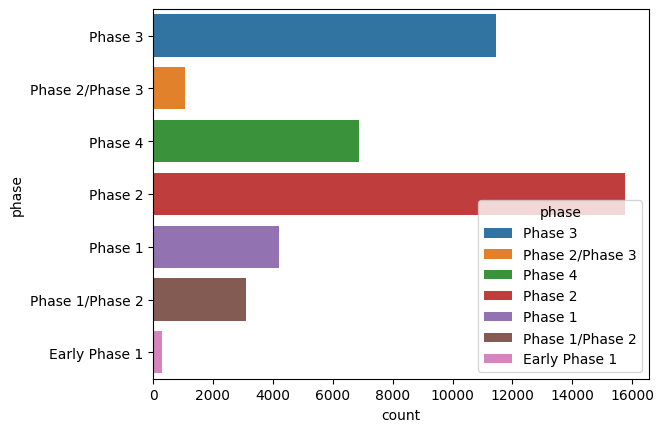

In [ ]:
feature_name = 'phase'
print(feature_name)
print('非NA数量:', All[feature_name].notna().sum())
print('NMI: ', NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes, continuous_target_discrete[All[feature_name].notna()]))
sns.countplot(data=All, y=feature_name, hue=feature_name)
plt.show()

sponsors/lead_sponsor/agency_class
非NA数量: 62058


/data2/huyaojun/.conda/envs/openmmlab/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


NMI:  0.06714869072644133


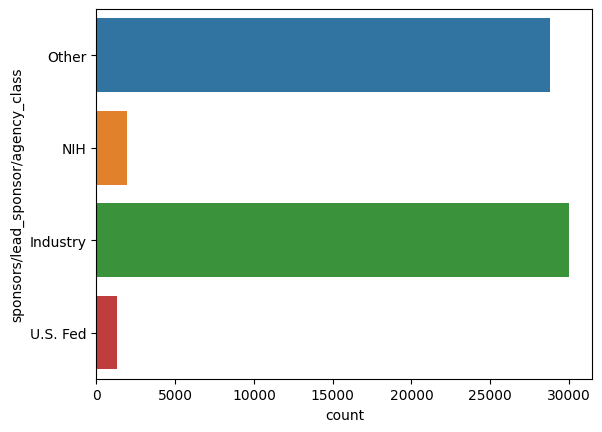

In [ ]:
feature_name = 'sponsors/lead_sponsor/agency_class'
print(feature_name)
print('非NA数量:', All[feature_name].notna().sum())
print('NMI: ', NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes, continuous_target_discrete[All[feature_name].notna()]))
sns.countplot(data=All, y=feature_name, hue=feature_name)
plt.show()

study_type
非NA数量: 62058
NMI:  0.002811026538073855


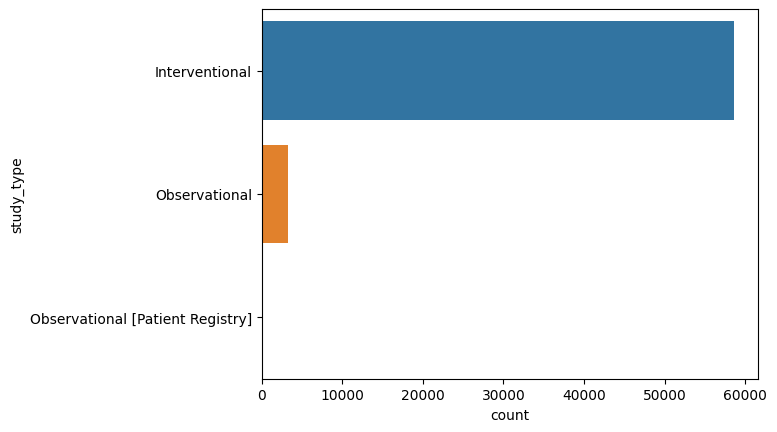

In [ ]:
feature_name = 'study_type'
print(feature_name)
print('非NA数量:', All[feature_name].notna().sum())
print('NMI: ', NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes, continuous_target_discrete[All[feature_name].notna()]))
sns.countplot(data=All, y=feature_name, hue=feature_name)
plt.show()

has_expanded_access
非NA数量: 61574


/data2/huyaojun/.conda/envs/openmmlab/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


NMI:  0.006122887737182305


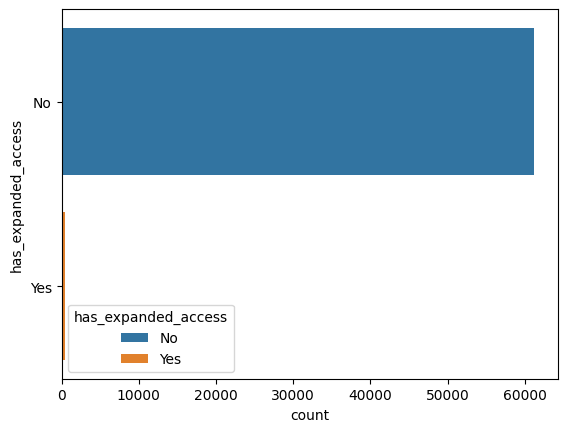

In [ ]:
feature_name = 'has_expanded_access'
print(feature_name)
print('非NA数量:', All[feature_name].notna().sum())
print('NMI: ', NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes, continuous_target_discrete[All[feature_name].notna()]))
sns.countplot(data=All, y=feature_name, hue=feature_name)
plt.show()

study_design_info/intervention_model
非NA数量: 58441
NMI:  0.16559458016578063


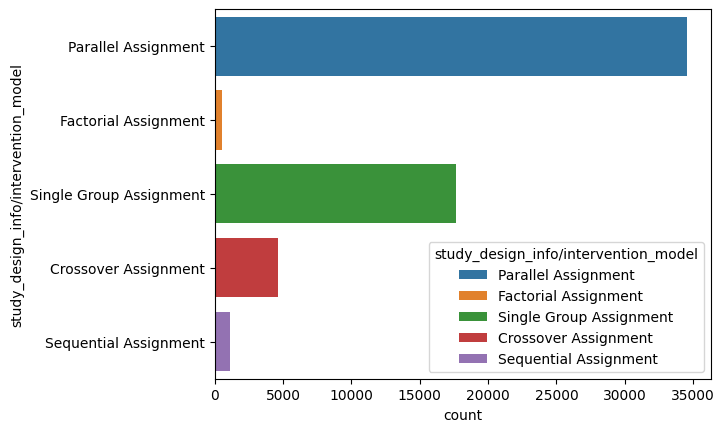

In [ ]:
feature_name = 'study_design_info/intervention_model'
print(feature_name)
print('非NA数量:', All[feature_name].notna().sum())
print('NMI: ', NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes, continuous_target_discrete[All[feature_name].notna()]))
sns.countplot(data=All, y=feature_name, hue=feature_name)
plt.show()

study_design_info/primary_purpose
非NA数量: 57781


/data2/huyaojun/.conda/envs/openmmlab/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


NMI:  0.07574818661305258


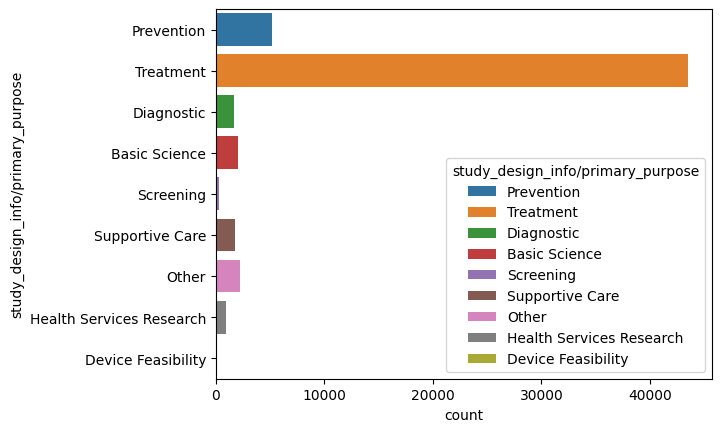

In [ ]:
feature_name = 'study_design_info/primary_purpose'
print(feature_name)
print('非NA数量:', All[feature_name].notna().sum())
print('NMI: ', NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes, continuous_target_discrete[All[feature_name].notna()]))
sns.countplot(data=All, y=feature_name, hue=feature_name)
plt.show()

eligibility/gender
非NA数量: 62058


/data2/huyaojun/.conda/envs/openmmlab/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


NMI:  0.0318119377822484


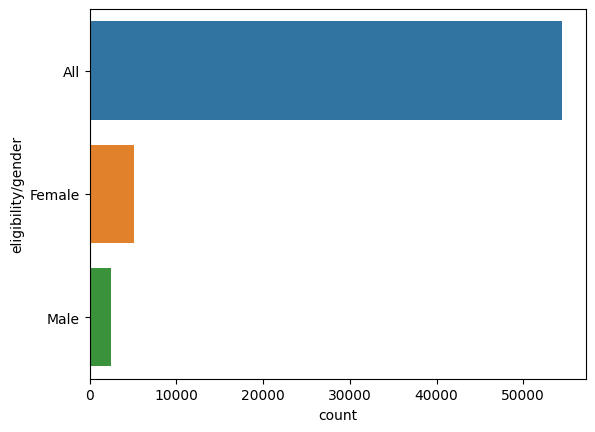

In [ ]:
feature_name = 'eligibility/gender'
print(feature_name)
print('非NA数量:', All[feature_name].notna().sum())
print('NMI: ', NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes, continuous_target_discrete[All[feature_name].notna()]))
sns.countplot(data=All, y=feature_name, hue=feature_name)
plt.show()

eligibility/healthy_volunteers
非NA数量: 61964


/data2/huyaojun/.conda/envs/openmmlab/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


NMI:  0.035295475107702035


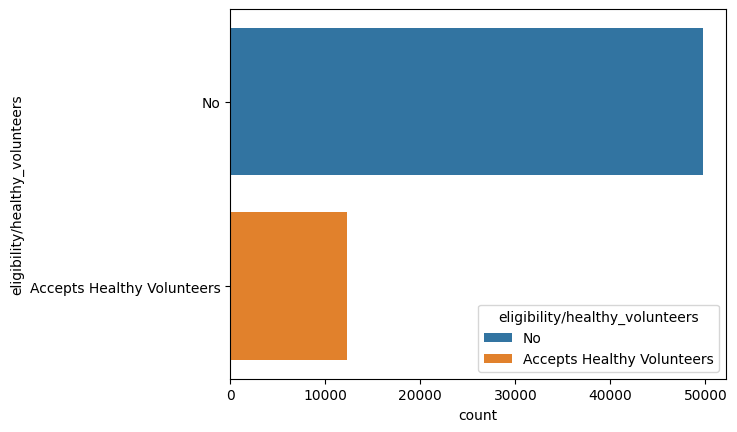

In [ ]:
feature_name = 'eligibility/healthy_volunteers'
print(feature_name)
print('非NA数量:', All[feature_name].notna().sum())
print('NMI: ', NMI(All[All[feature_name].notna()][feature_name].astype('category').cat.codes, continuous_target_discrete[All[feature_name].notna()]))
sns.countplot(data=All, y=feature_name, hue=feature_name)
plt.show()